In [ ]:
#Getting Twitter Data 
#Access twitter API in python
!pip install tweepy
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [ ]:
#Reading Keys
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
#searching tweets
# Define the search term and the date_since date as variables
search_words = "indian railway privatisation"
date_since = "2020-05-01"

In [ ]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(1000)
tweets

In [ ]:
# Collect tweets
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_since).items(1000)

# Collect a list of tweets
[tweet.text for tweet in tweets]


['RT @TribalArmy: Indian Railway is our pride, \nStop Imidently privatisation.\n#SaveRailwaySaveNation https://t.co/0eRZx0aXMA',
 'RT @SaheeRa25385705: All India Agitation against Privatisation in Indian Railway \non Puna Pact Day, 24th Sept.,2020\n#StopPrivatisationSaveR…',
 'RT @VinayTi29822876: अब तो जग जाए मोदी जी।।\nIndian Railway is our pride, \nStop Imidently privatisation.\n#SaveRailwaySaveNation\n#25सितम्बर_…',
 'RT @basantchaturve9: Indian Railway is our pride, Stop privatisation\n#SaveRailwaySaveNation\n@PMOIndia @RailMinIndia  @PiyushGoyal @ShivaGop…',
 '@PMOIndia You hv also said in the BHU campus there will be no privatisation in Indian railway,but today we r seeing… https://t.co/6f0McaPBBv',
 'RT @basantchaturve9: Indian Railway is our pride, Stop privatisation\n#SaveRailwaySaveNation\n@PMOIndia @RailMinIndia  @PiyushGoyal @ShivaGop…',
 'RT @VinayTi29822876: अब तो जग जाए मोदी जी।।\nIndian Railway is our pride, \nStop Imidently privatisation.\n#SaveRailwaySaveNation\n#25स

In [ ]:
#filtering retweets
new_search = search_words + " -filter:retweets"
new_search

'indian railway privatisation -filter:retweets'

In [ ]:
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(1000)

[tweet.text for tweet in tweets]

['@PMOIndia You hv also said in the BHU campus there will be no privatisation in Indian railway,but today we r seeing… https://t.co/6f0McaPBBv',
 '@narendramodi sir AISCSTREA Agitations against PRIVATION  in Indian Railway "STOP PRIVATISATION"- Save for poor  pe… https://t.co/DK8JXIlzPi',
 'Impact of privatisation by modi govt.\n1. Increased fual and gas prices.\n2. User paying monthly minimum price for mo… https://t.co/XDNvt320JO',
 '@SurajKrBauddh @BhimArmyChief All India Agitation against Privatisation in Indian Railway \non Puna Pact Day, 24th S… https://t.co/86R1RDH0uG',
 '@narendramodi Plz stop privatisation in Indian railway',
 'SAVE NATION SAVE INDIAN \nRAILWAY \nSTOP PRIVATISATION OF INDIAN RAILWAYS \nPMO INDIA \nPIYUSHGOYAL  RAILWAY MINISTER… https://t.co/h31DPBbA4o',
 '@PiyushGoyalOffc respected sir with due respect I plead on behalf of Indian youth to give opportunity of jobs in ra… https://t.co/D7XxA7vz7m',
 'All India Agitation against Privatisation in Indian Railway \non

In [ ]:
#name and location of tweets
tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(1000)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs

[['KISHOREJICONTR1', ''],
 ['RadhaRamanRana1', ''],
 ['RuhJain7990', ''],
 ['SagarDeepak15', 'Rajasthan, India'],
 ['ssmr1984', 'Jaipur, India'],
 ['RajaniK13899528', 'Varanasi '],
 ['SarikaJ39573528', 'अजमेर, भारत'],
 ['9ed028d0ad1943a', ''],
 ['mritunjay92', 'Noida, India'],
 ['SHARMAR09415918', ''],
 ['SaheeRa25385705', ''],
 ['BimalChanda10', ''],
 ['PHOOLSINGHBAIR5', 'kazipet , Warangal'],
 ['Ramashi07224317', 'Sheikhpura, India'],
 ['Ramashi07224317', 'Sheikhpura, India'],
 ['JayTiwa48025890', ''],
 ['AmarSahani20795', 'Bhadohi, India'],
 ['TheUnitedIndia2', ''],
 ['ssmr1984', 'Jaipur, India'],
 ['ssmr1984', 'Jaipur, India'],
 ['amit4u_social', 'Ambala, India'],
 ['amit4u_social', 'Ambala, India'],
 ['pandeyroh', 'GORAKHPUR'],
 ['Avadhes19817367', ''],
 ['Avadhes19817367', ''],
 ['AmitKum16259081', 'Jalandhar, Punjab'],
 ['AlokTom95426440', ''],
 ['siddhar25372214', 'Khandwa, India'],
 ['ssmr1984', 'Jaipur, India'],
 ['AajBichaar', 'New Delhi, India'],
 ['iamprem_k', ''],
 ['Jina

In [ ]:
#create pandas dataframe
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location"])
tweet_text

,user,location
0,KISHOREJICONTR1,
1,RadhaRamanRana1,
2,RuhJain7990,
3,SagarDeepak15,"Rajasthan, India"
4,ssmr1984,"Jaipur, India"
...,...,...
379,shiva_congress,"Hyderabad, India"
380,AfzalKhan_INC,"Gujarat, India"
381,OfficialRenju,
382,NayanJain_25,"Madhya Pradesh, India"


In [ ]:
new_search = "railway+indian+privatisation -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=new_search,
                   lang="en",
                   since='2020-05-01').items(1000)

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:]

['@PMOIndia You hv also said in the BHU campus there will be no privatisation in Indian railway,but today we r seeing… https://t.co/6f0McaPBBv',
 '@narendramodi sir AISCSTREA Agitations against PRIVATION  in Indian Railway "STOP PRIVATISATION"- Save for poor  pe… https://t.co/DK8JXIlzPi',
 'Impact of privatisation by modi govt.\n1. Increased fual and gas prices.\n2. User paying monthly minimum price for mo… https://t.co/XDNvt320JO',
 '@SurajKrBauddh @BhimArmyChief All India Agitation against Privatisation in Indian Railway \non Puna Pact Day, 24th S… https://t.co/86R1RDH0uG',
 '@narendramodi Plz stop privatisation in Indian railway',
 'SAVE NATION SAVE INDIAN \nRAILWAY \nSTOP PRIVATISATION OF INDIAN RAILWAYS \nPMO INDIA \nPIYUSHGOYAL  RAILWAY MINISTER… https://t.co/h31DPBbA4o',
 '@PiyushGoyalOffc respected sir with due respect I plead on behalf of Indian youth to give opportunity of jobs in ra… https://t.co/D7XxA7vz7m',
 'All India Agitation against Privatisation in Indian Railway \non

In [ ]:
#removing URL
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
#clean tweets
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:]

['PMOIndia You hv also said in the BHU campus there will be no privatisation in Indian railwaybut today we r seeing',
 'narendramodi sir AISCSTREA Agitations against PRIVATION in Indian Railway STOP PRIVATISATION Save for poor pe',
 'Impact of privatisation by modi govt1 Increased fual and gas prices2 User paying monthly minimum price for mo',
 'SurajKrBauddh BhimArmyChief All India Agitation against Privatisation in Indian Railway on Puna Pact Day 24th S',
 'narendramodi Plz stop privatisation in Indian railway',
 'SAVE NATION SAVE INDIAN RAILWAY STOP PRIVATISATION OF INDIAN RAILWAYS PMO INDIA PIYUSHGOYAL RAILWAY MINISTER',
 'PiyushGoyalOffc respected sir with due respect I plead on behalf of Indian youth to give opportunity of jobs in ra',
 'All India Agitation against Privatisation in Indian Railway on Puna Pact Day 24th Sept2020',
 'gtIndian railway PSU AIRPORT AIR INDIA ka privatisation krwaengeIndia developing country s Under developing bnayenge',
 'ANI The initial privatised par

In [ ]:
# Split the words from one tweet into unique elements
all_tweets_no_urls[0].lower().split()

['pmoindia',
 'you',
 'hv',
 'also',
 'said',
 'in',
 'the',
 'bhu',
 'campus',
 'there',
 'will',
 'be',
 'no',
 'privatisation',
 'in',
 'indian',
 'railwaybut',
 'today',
 'we',
 'r',
 'seeing']

In [ ]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['pmoindia',
  'you',
  'hv',
  'also',
  'said',
  'in',
  'the',
  'bhu',
  'campus',
  'there',
  'will',
  'be',
  'no',
  'privatisation',
  'in',
  'indian',
  'railwaybut',
  'today',
  'we',
  'r',
  'seeing'],
 ['narendramodi',
  'sir',
  'aiscstrea',
  'agitations',
  'against',
  'privation',
  'in',
  'indian',
  'railway',
  'stop',
  'privatisation',
  'save',
  'for',
  'poor',
  'pe']]

In [ ]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(20)

[('indian', 359),
 ('railway', 352),
 ('is', 251),
 ('stop', 228),
 ('our', 222),
 ('pride', 204),
 ('privatisation', 138),
 ('of', 103),
 ('imidently', 97),
 ('piyushgoyal', 94),
 ('privatisationsaverailwaysavenation', 80),
 ('railminindia', 79),
 ('in', 74),
 ('the', 72),
 ('india', 63),
 ('privatisationsaverailwaysavenationpmoindia', 55),
 ('against', 52),
 ('shivagopalmish1', 48),
 ('saverailwaysavenation', 44),
 ('on', 42)]

In [ ]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(20),
                             columns=['words', 'count'])

clean_tweets_no_urls

,words,count
0,indian,359
1,railway,352
2,is,251
3,stop,228
4,our,222
5,pride,204
6,privatisation,138
7,of,103
8,imidently,97
9,piyushgoyal,94


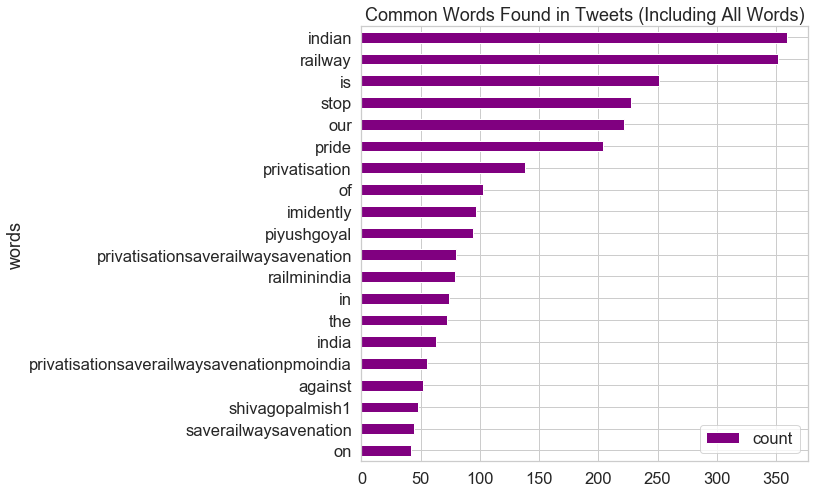

In [ ]:
#Common Words Plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [ ]:
#removing stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['who', 'in', "didn't", 'was', 'that', 'these', 'no', "you've", 'our', 'on']

In [ ]:
#words in tweet
words_in_tweet[0]

['pmoindia',
 'you',
 'hv',
 'also',
 'said',
 'in',
 'the',
 'bhu',
 'campus',
 'there',
 'will',
 'be',
 'no',
 'privatisation',
 'in',
 'indian',
 'railwaybut',
 'today',
 'we',
 'r',
 'seeing']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


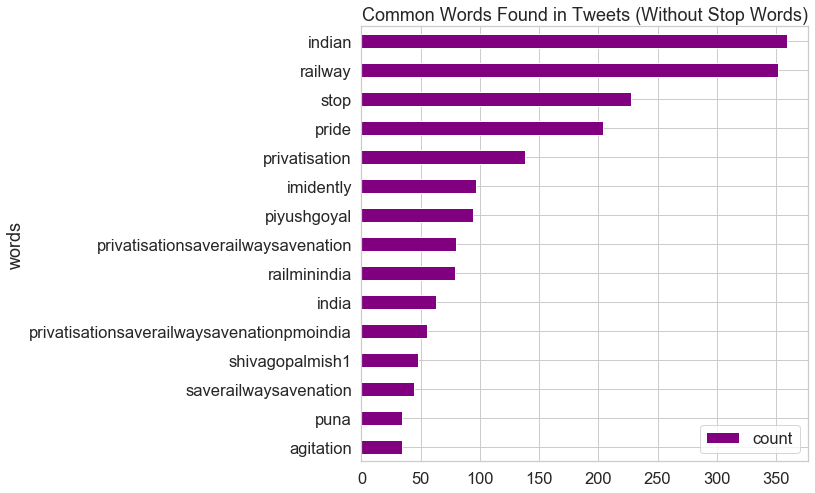

In [ ]:
#removing stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

#removing collection words
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

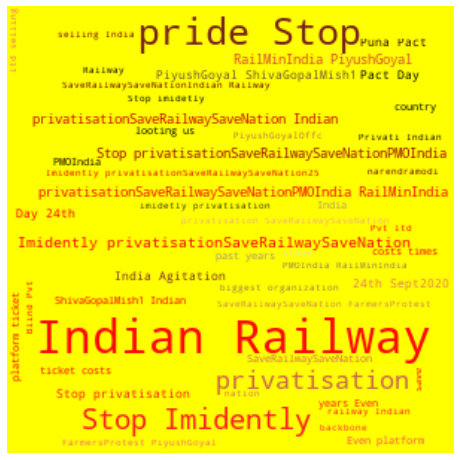

In [ ]:
#plot the wordcloud
allwords = ' '.join([tweet for tweet in all_tweets_no_urls])
mask = np.array(Image.open("Desktop/mickey.jpg"))
color= ImageColorGenerator(mask)
wordcloud = WordCloud(width=400, height=400,
                      max_words=50,mask=mask, stopwords=STOPWORDS,   background_color ='yellow', random_state=42).generate(allwords)
plt.figure(figsize = (8, 10), facecolor = None)
plt.imshow(wordcloud.recolor(color_func=color),interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
from nltk import bigrams
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in counts_nsw]

# View bigrams for the first tweet
terms_bigram[0]
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

#create dataframe

bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(t, i)",179
1,"(a, t)",174
2,"(s, a)",153
3,"(o, n)",128
4,"(v, e)",119
5,"(i, o)",118
6,"(r, a)",115
7,"(i, n)",109
8,"(a, v)",108
9,"(a, i)",97


In [ ]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

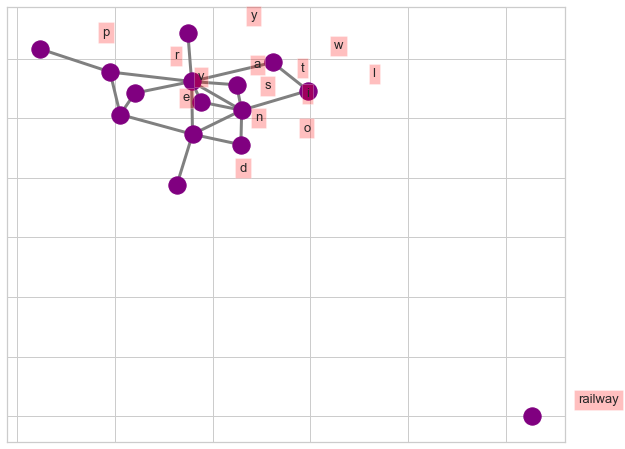

In [ ]:
!pip install networkx
import networkx as nx
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("railway", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [ ]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in all_tweets_no_urls]

sentiment_objects[100].polarity, sentiment_objects[100]

(0.0,
 TextBlob("SaveRailwaySaveNationIndian Railway is our pride Stop Imidently privatisationSaveRailwaySaveNationIndian"))

In [ ]:
print(sentiment_objects)

[TextBlob("PMOIndia You hv also said in the BHU campus there will be no privatisation in Indian railwaybut today we r seeing"), TextBlob("narendramodi sir AISCSTREA Agitations against PRIVATION in Indian Railway STOP PRIVATISATION Save for poor pe"), TextBlob("Impact of privatisation by modi govt1 Increased fual and gas prices2 User paying monthly minimum price for mo"), TextBlob("SurajKrBauddh BhimArmyChief All India Agitation against Privatisation in Indian Railway on Puna Pact Day 24th S"), TextBlob("narendramodi Plz stop privatisation in Indian railway"), TextBlob("SAVE NATION SAVE INDIAN RAILWAY STOP PRIVATISATION OF INDIAN RAILWAYS PMO INDIA PIYUSHGOYAL RAILWAY MINISTER"), TextBlob("PiyushGoyalOffc respected sir with due respect I plead on behalf of Indian youth to give opportunity of jobs in ra"), TextBlob("All India Agitation against Privatisation in Indian Railway on Puna Pact Day 24th Sept2020"), TextBlob("gtIndian railway PSU AIRPORT AIR INDIA ka privatisation krwaengeIndia 

In [ ]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values


[[0.0,
  'PMOIndia You hv also said in the BHU campus there will be no privatisation in Indian railwaybut today we r seeing'],
 [-0.4,
  'narendramodi sir AISCSTREA Agitations against PRIVATION in Indian Railway STOP PRIVATISATION Save for poor pe'],
 [0.0,
  'Impact of privatisation by modi govt1 Increased fual and gas prices2 User paying monthly minimum price for mo'],
 [0.0,
  'SurajKrBauddh BhimArmyChief All India Agitation against Privatisation in Indian Railway on Puna Pact Day 24th S'],
 [0.0, 'narendramodi Plz stop privatisation in Indian railway'],
 [0.0,
  'SAVE NATION SAVE INDIAN RAILWAY STOP PRIVATISATION OF INDIAN RAILWAYS PMO INDIA PIYUSHGOYAL RAILWAY MINISTER'],
 [-0.125,
  'PiyushGoyalOffc respected sir with due respect I plead on behalf of Indian youth to give opportunity of jobs in ra'],
 [0.0,
  'All India Agitation against Privatisation in Indian Railway on Puna Pact Day 24th Sept2020'],
 [0.0,
  'gtIndian railway PSU AIRPORT AIR INDIA ka privatisation krwaengeIndia

In [ ]:
#converting into dataframe
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

,polarity,tweet
0,0.00,PMOIndia You hv also said in the BHU campus th...
1,-0.40,narendramodi sir AISCSTREA Agitations against ...
2,0.00,Impact of privatisation by modi govt1 Increase...
3,0.00,SurajKrBauddh BhimArmyChief All India Agitatio...
4,0.00,narendramodi Plz stop privatisation in Indian ...
...,...,...
379,-0.25,Indian Railway has been looting us for the pas...
380,-0.25,Indian Railway has been looting us for the pas...
381,-0.25,Indian Railway has been looting us for the pas...
382,-0.25,Indian Railway has been looting us for the pas...


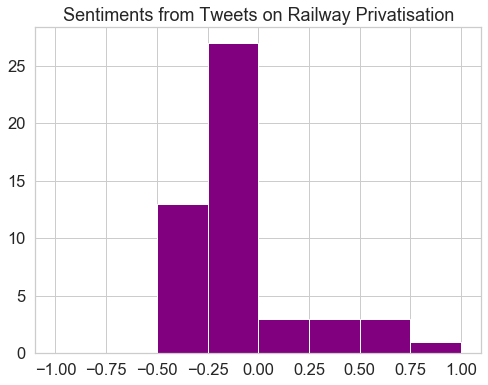

In [ ]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Railway Privatisation")
plt.show()

In [ ]:
testimonial = TextBlob(str(sentiment_objects))

In [ ]:
testimonial.sentiment

Sentiment(polarity=-0.10875000000000001, subjectivity=0.3475657894736843)

In [ ]:
testimonial.sentiment.polarity

-0.10875000000000001

In [ ]:
testimonial.sentiment.subjectivity

0.3475657894736843